## Project1 - House Price Prediction

In [76]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
# load the dataset
df= pd.read_csv('datasets_20710_26737_Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [78]:
df.shape

(13320, 9)

### Data Preprocessing : Data Cleaning

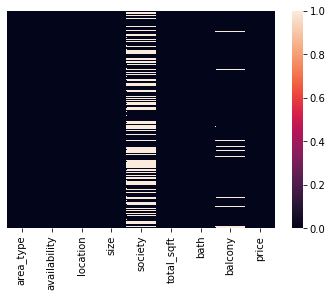

In [79]:
#checking foe null values in the dataset
sns.heatmap(df.isnull(),yticklabels=False)

In [80]:
#Feature Society missing percentage 
Society_Missing_Percent = df.society.isnull().sum() * 100 / len(df)
Society_Missing_Percent

41.306306306306304

In [81]:
#Feature balcony missing percentage
balcony_Missing_Percent = df.balcony.isnull().sum() * 100 / len(df)
balcony_Missing_Percent

4.572072072072072

In [82]:
#Checking the different values in the "area_type"
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [83]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [84]:
#Droping 'area_type', 'availability', 'society','balcony'
df2=df.drop(['area_type', 'availability', 'society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [85]:
#checking null values in the datasets
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [86]:
#Drop all remaining null values
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [87]:
df3.shape

(13246, 5)

In [88]:
#Clean the size feature
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [89]:
#create new feature by deriving values from size
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [90]:
df3=df3.drop('size',axis=1)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [91]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [92]:
#cleaning feature "total_sqft"
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [93]:
# check the non-float values in the total_sqft feature
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [94]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [95]:
def total_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
       return (float(tokens[0])+float(tokens[1]))/2
    try:
       return float(x)
    except:
       return None

In [96]:
df3['total_sqft'] = df3['total_sqft'].apply(total_sqft)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [97]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk


In [98]:
df3.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [99]:
df3.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


### Data Processing : Feature Engineering &Dimensionality Reduction

In [100]:
# take copy of the dataset
df5 = df3.copy()

In [101]:
#creating new feature"price_per_sqft"
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### "location" is the categorical feature, so need to check for any high dimenstional challenges
#### Business conditions: 
            * Check for number of values appearing below 10 time and group those into "others" 
    

In [102]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [103]:
#Checking the toal unique value in "location"
len(df5['location'].unique())

1304

In [104]:
df5.location = df5.location.apply(lambda x:x.strip())
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [105]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [106]:
#Number of locations appearing less than 10 times
len(location_stats[location_stats<10])

1039

In [107]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

location
Chandra Layout        9
Jakkur Plantation     9
2nd Phase JP Nagar    9
Yemlur                9
Mathikere             9
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1039, dtype: int64

In [108]:
# number of values appearing below 10 time and group those into "others"
df5['location'] = df5['location'].apply(lambda x : 'others' if x in location_stats_less_than_10 else x)
df5['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [109]:
df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
others                 2751
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
                       ... 
Gunjur Palya             10
Basapura                 10
BTM 1st Stage            10
Sector 1 HSR Layout      10
Kalkere                  10
Name: location, Length: 255, dtype: int64

In [110]:
# numbers of columns after grouping the values appearing less than 10 times into others
len(df5['location'].unique())

255

In [111]:
#checking the if any field values appearing less than 10 times is exist or not
df5.groupby('location')['location'].agg('count').sort_values(ascending=True)

location
Kalkere                  10
Sector 1 HSR Layout      10
BTM 1st Stage            10
Basapura                 10
Gunjur Palya             10
                       ... 
Kanakpura Road          266
Electronic City         304
Sarjapur  Road          392
Whitefield              535
others                 2751
Name: location, Length: 255, dtype: int64

### Data Preprocessing : Outlier Removal

In [112]:
df6 = df5.copy()
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


#### Check the outliers/Anamoly/data error in bhk feature
* Business condtion - 300sqft required for 1 BHK for standard house 

In [113]:
#total number of rows in the dataframe
df6.shape

(13246, 6)

In [114]:
#removing the records who's sqft is less than 300 after dividing the total sqft with number of BHK
df6 = df6[~(df6['total_sqft']/df6['bhk']<300)]

In [115]:
# total number of rows after removing the outlier in BHK
df6.shape

(12502, 6)

### check for some more outliers in the "total_sqft" feature

In [116]:
# check for some more outliers in the "total_sqft" feature
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

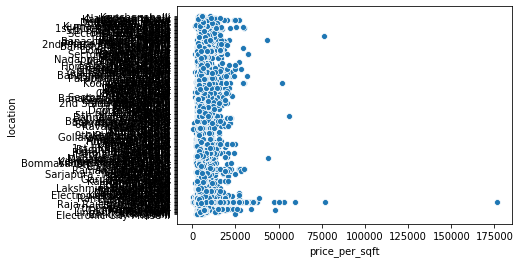

In [117]:
sns.scatterplot(df6.price_per_sqft,df6.location,data=df6,)

In [118]:
# write function and remove record stdeviate +1 and -1 from mean
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        df_reduced = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<(m+std))]
        df_out = pd.concat([df_out,df_reduced], ignore_index=True)
    return df_out
        
df7 = remove_pps_outliers(df6)   

In [119]:
df7.shape

(10222, 6)

* To test the function
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        df_reduced = subdf[(subdf.price_per_sqft>(m-std)) &m (subdf.price_per_sqft<(m+std))]
        df_out = pd.concat([df_out,df_reduced], ignore_index=True)
        print (subdf)
        print ('Mean is {}'.format(m))
        print ('std is {}'.format(std))
        print(df_reduced)
    return df_out
remove_pps_outliers(df6)

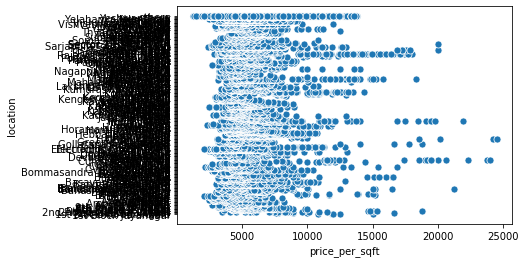

In [120]:
sns.scatterplot(df7.price_per_sqft,df7.location,data=df7,s=50)

#### Check the Price and BHK using Scatter plot

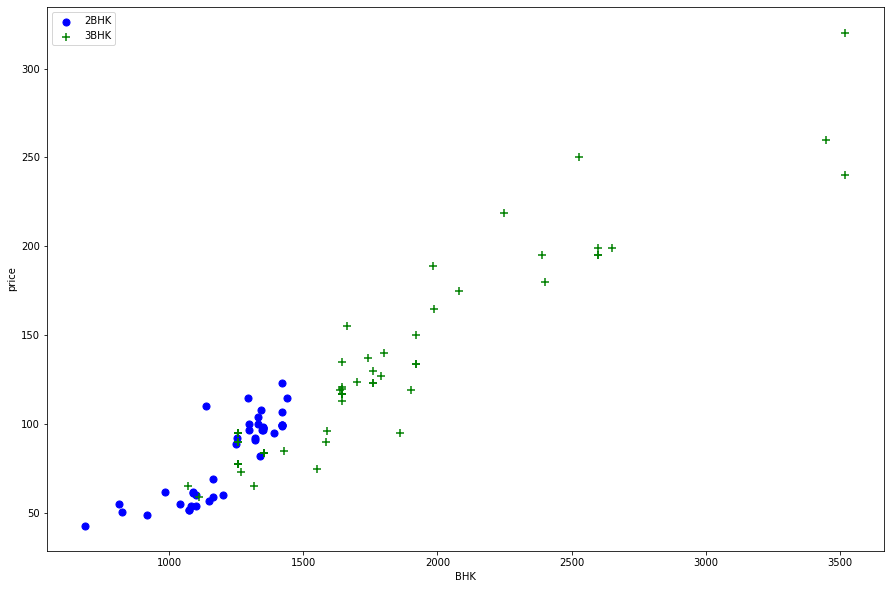

In [121]:
import matplotlib
def price_bhk_check(df,location):
    BHK2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    BHK3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft, BHK2.price, color = 'blue', s=50, label='2BHK')
    plt.scatter(BHK3.total_sqft, BHK3.price, color = 'green', s=50, marker='+', label='3BHK')
    
    plt.xlabel('BHK')
    plt.ylabel('price')
    
    plt.legend()
    
price_bhk_check(df7, 'Hebbal')

### Need to remove records having price_per_sqft value is less by comparing with records having less BHK

In [122]:
def remove_bhk_outliers(df):
    exclude_indices = ([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 0)

df8 = remove_bhk_outliers(df7)
df8.shape

(7369, 6)

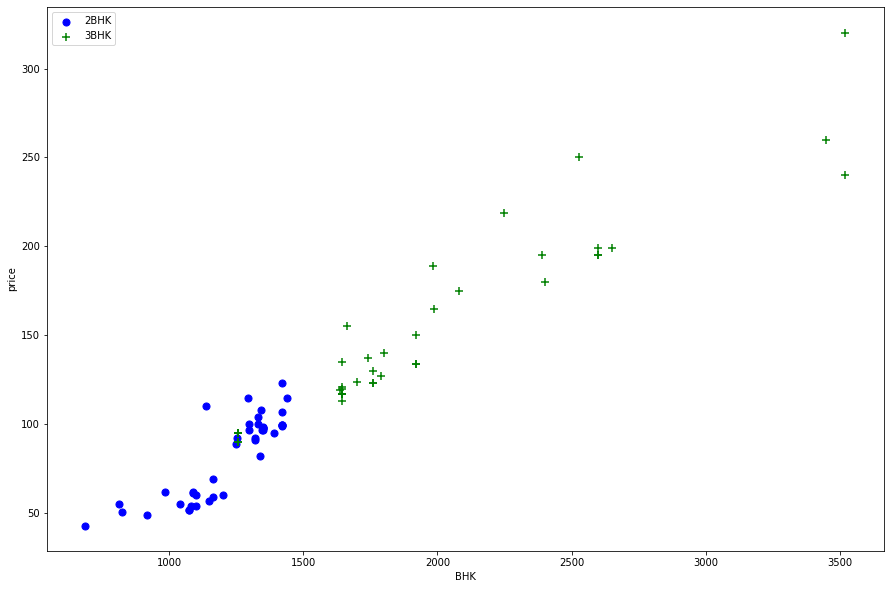

In [123]:
price_bhk_check(df8, 'Hebbal')

Text(0, 0.5, 'count')

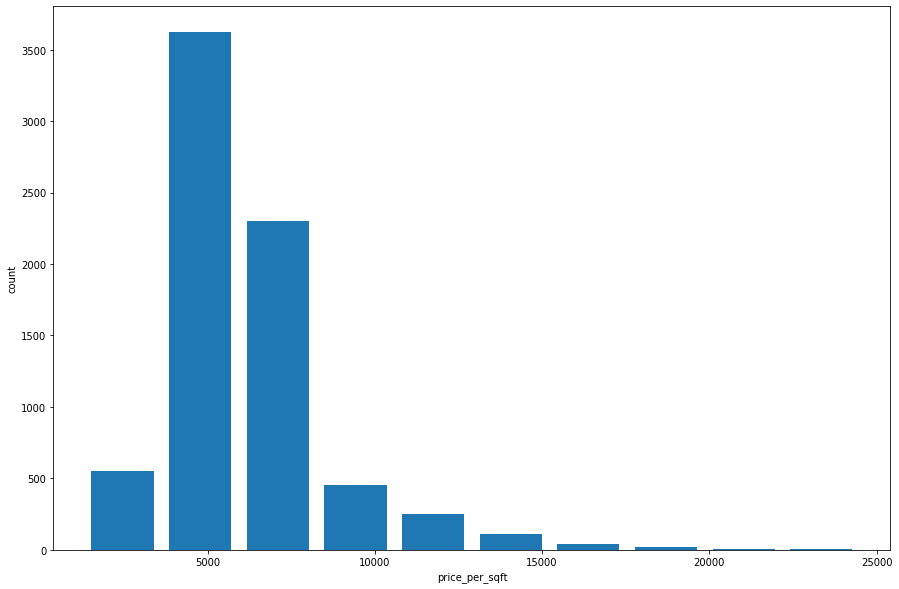

In [124]:
#checking the number of appartments for per sqft
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

Observation : Data has the normal distribution - Price_Per_Sqft looks good

#### Check the Bath feature:

* Business logic : should remove records with (number of bathrooms > (number of bhk + 2))

In [125]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [126]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8547,others,12000.0,12.0,525.0,10,4375.000000
8633,others,10000.0,16.0,550.0,16,5500.000000
9329,others,6000.0,12.0,150.0,11,2500.000000
9642,others,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

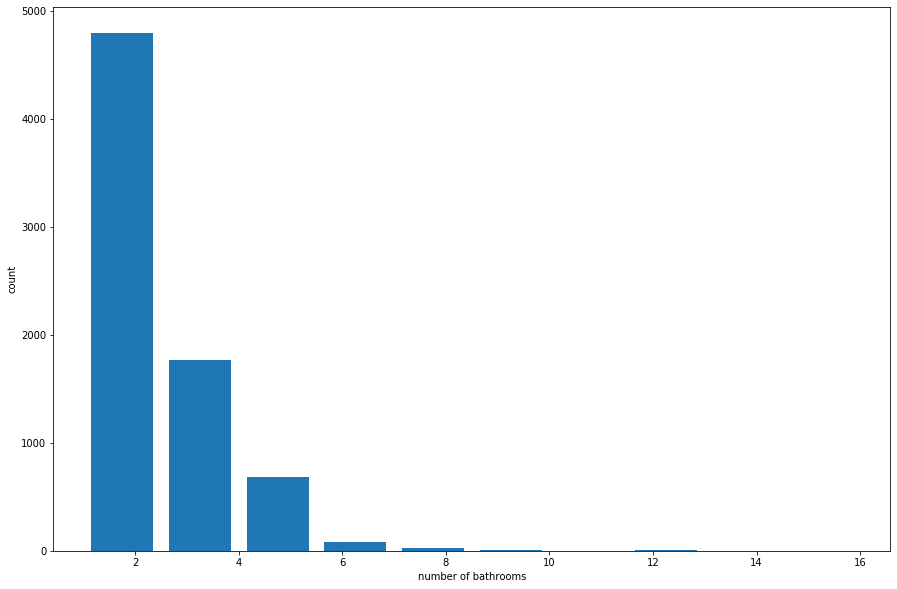

In [127]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [128]:
#check the business condition 
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8476,others,11338.0,9.0,1000.0,6,8819.897689


In [129]:
#remove the records which does not meet the business logic
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7291, 6)

##### Observation : Now the dataset looks need and clean has onlt ~7K records. So need to prepare the dataset for machne learning training by dropping some unnecesary features("price per square feet")

In [130]:
df10 = df9.drop(['price_per_sqft'], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Need to convert the categorical feature into numeric feature using OneHot Encoding(also called Dummies)

In [131]:
# convert the location feature into numeric feature using get dummies
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#remove the last column to avoid the dummies trap
dummies = dummies.drop('others',axis=1)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
#create new dataset by concating d10 and dummies
df11 = pd.concat([df10,dummies],axis=1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#drop location column
df12 = df11.drop('location',axis=1)
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df12.shape

(7291, 258)

###  Dataset is ready for Machine Learning Model Building

#### Split that dataset for training and test using train_test_split

In [135]:
#create X and y variable with independent and dependent features
X = df12.drop('price', axis =1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

### use train_test_split function to split the dataset

In [137]:
#using train_test_split
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.2, random_state=10)

In [139]:
len(X_train)

5832

In [140]:
len(X_test)

1459

### Train in the MachineLearning Model

In [142]:
# use LinearRegression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test,y_test)

0.8556662450161991

### Check the model using K-Fold Cross Validation Techinque

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [148]:
#wrong way of doing K-Fold cros validation 
cross_val_score(LinearRegression(),X,y)

array([-2.03761093e+16, -2.00647879e+16,  5.94870687e-01,  5.28030999e-01,
        7.20142965e-01])

In [147]:
#use shuffle function will randomly shuffle the data for best results
cv = ShuffleSplit(n_splits=5,test_size=.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85566625, 0.82469275, 0.83943699, 0.86036586, 0.79381551])

### Use GridSearch API to find the best model for Mdel Building

In [150]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [161]:
#define a function
def find_best_fit_model_usingGridsearchcv(x,y):
    algos = {
        'linear_reg' :{
            'model': LinearRegression(),
            'param': {
                'normalize':[True, False]
            }
        },
        'lasso' :{
            'model': Lasso(),
            'param':{
                'alpha':[1,2],
                'selection':['cyclic','random']
            }
        },
        'Decision_tree':{
            'model': DecisionTreeRegressor(),
            'param':{
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    score =[]
    cv=ShuffleSplit(n_splits=5, test_size =.2, random_state=10)
    for algo_names, config in algos.items():
        gs = GridSearchCV(config['model'],config['param'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        score.append({
                'model': algo_names,
                'best_score' : gs.best_score_,
                'best_params' : gs.best_params_
            })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

In [162]:
find_best_fit_model_usingGridsearchcv(X,y)

,model,best_score,best_params
0,linear_reg,0.834795,{'normalize': False}
1,lasso,0.671281,"{'alpha': 2, 'selection': 'random'}"
2,Decision_tree,0.738483,"{'criterion': 'mse', 'splitter': 'best'}"


### Observation : Linear Reg is the best Algo to build the model

In [163]:
#function to predict the price using linearReg algo
def price_predict(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
          x[loc_index] = 1
    return lr_model.predict([x])[0]

In [167]:
#428.0
price_predict('1st Block Jayanagar',2850,4,4)

356.3974481777178

In [168]:
price_predict('1st Phase JP Nagar',1000,3,3)

87.39878275548688

In [172]:
price_predict('1st Phase JP Nagar',1000,2,2)

86.10543612162584

In [174]:
price_predict('Indira Nagar',1000,2,2)

172.16322432857856

In [175]:
price_predict('Indira Nagar',1000,3,3)

173.45657096243963

### Export the Model as Pickle file

In [176]:
import pickle

In [178]:
with open('Bangalore_house_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

### Export column data in json file for model deployment

In [179]:
import json

In [180]:
columns = {
    'data_column' : [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    
   f.write(json.dumps(columns))


### Bangalore House Price Prediction Model is build with LinearRegression MachineLearning Algorithm

Artifacts exported for deployment:
    * Pickle file
    * column name json file